In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_report = pd.read_csv('/home/ls283h/Work/CCTV/reports/report_20191216.csv')
df_report.head()

,timestamp,image,car,person,bicycle,motorcycle,bus,truck
0,2019-12-03 13:34:39.598283,1575088201428_A03_2019_11_30__4_30_1.jpg,2,0,0,0,0,0
1,2019-12-03 13:34:39.598283,1575088201431_A66_2019_11_30__4_30_5.jpg,5,0,0,0,0,0
2,2019-12-03 13:34:39.598283,1575088201437_A47_2019_11_30__4_30_5.jpg,1,0,0,0,0,1
3,2019-12-03 13:34:39.598283,1575088201441_A82_2019_11_30__4_30_5.jpg,2,2,0,0,0,1
4,2019-12-03 13:34:39.598283,1573466401449_A66_2019_11_11__10_0_5.jpg,1,5,1,0,0,2


In [3]:
# nice way to find the position of an element in a string which is not the same in al the strings
year_pos = df_report['image'][0].find('2019')
year_pos

18

In [4]:
# extracting the timestamp of the name of the files in milliseconds
df_report.drop(['timestamp'], axis=1, inplace=True)
df_report['timestp_UTC'] = df_report['image'].str[0:13]
df_report['timestp_UTC'] = pd.to_datetime(df_report['timestp_UTC'], unit='ms')

df_report.head()

,image,car,person,bicycle,motorcycle,bus,truck,timestp_UTC
0,1575088201428_A03_2019_11_30__4_30_1.jpg,2,0,0,0,0,0,2019-11-30 04:30:01.428
1,1575088201431_A66_2019_11_30__4_30_5.jpg,5,0,0,0,0,0,2019-11-30 04:30:01.431
2,1575088201437_A47_2019_11_30__4_30_5.jpg,1,0,0,0,0,1,2019-11-30 04:30:01.437
3,1575088201441_A82_2019_11_30__4_30_5.jpg,2,2,0,0,0,1,2019-11-30 04:30:01.441
4,1573466401449_A66_2019_11_11__10_0_5.jpg,1,5,1,0,0,2,2019-11-11 10:00:01.449


In [5]:
#unnecessary - learning purposes
df_report['timestp_UTC'] = df_report['timestp_UTC'].map(lambda x: x.replace(second=0))
df_report.head()

,image,car,person,bicycle,motorcycle,bus,truck,timestp_UTC
0,1575088201428_A03_2019_11_30__4_30_1.jpg,2,0,0,0,0,0,2019-11-30 04:30:00.428
1,1575088201431_A66_2019_11_30__4_30_5.jpg,5,0,0,0,0,0,2019-11-30 04:30:00.431
2,1575088201437_A47_2019_11_30__4_30_5.jpg,1,0,0,0,0,1,2019-11-30 04:30:00.437
3,1575088201441_A82_2019_11_30__4_30_5.jpg,2,2,0,0,0,1,2019-11-30 04:30:00.441
4,1573466401449_A66_2019_11_11__10_0_5.jpg,1,5,1,0,0,2,2019-11-11 10:00:00.449


In [6]:
type(df_report.timestp_UTC[0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
# put all seconds to zero
df_report['timestp_UTC'] = df_report['timestp_UTC'].dt.floor('min')
df_report.head()

,image,car,person,bicycle,motorcycle,bus,truck,timestp_UTC
0,1575088201428_A03_2019_11_30__4_30_1.jpg,2,0,0,0,0,0,2019-11-30 04:30:00
1,1575088201431_A66_2019_11_30__4_30_5.jpg,5,0,0,0,0,0,2019-11-30 04:30:00
2,1575088201437_A47_2019_11_30__4_30_5.jpg,1,0,0,0,0,1,2019-11-30 04:30:00
3,1575088201441_A82_2019_11_30__4_30_5.jpg,2,2,0,0,0,1,2019-11-30 04:30:00
4,1573466401449_A66_2019_11_11__10_0_5.jpg,1,5,1,0,0,2,2019-11-11 10:00:00


In [8]:
# extracting date and time in separate columns as requested by Mark
df_report['Date'] = df_report['timestp_UTC'].dt.strftime('%Y-%m-%d')
df_report['Time'] = df_report['timestp_UTC'].dt.strftime('%H:%M')
df_report.head()

,image,car,person,bicycle,motorcycle,bus,truck,timestp_UTC,Date,Time
0,1575088201428_A03_2019_11_30__4_30_1.jpg,2,0,0,0,0,0,2019-11-30 04:30:00,2019-11-30,04:30
1,1575088201431_A66_2019_11_30__4_30_5.jpg,5,0,0,0,0,0,2019-11-30 04:30:00,2019-11-30,04:30
2,1575088201437_A47_2019_11_30__4_30_5.jpg,1,0,0,0,0,1,2019-11-30 04:30:00,2019-11-30,04:30
3,1575088201441_A82_2019_11_30__4_30_5.jpg,2,2,0,0,0,1,2019-11-30 04:30:00,2019-11-30,04:30
4,1573466401449_A66_2019_11_11__10_0_5.jpg,1,5,1,0,0,2,2019-11-11 10:00:00,2019-11-11,10:00


In [9]:
# Set datetime index, which allow us to develop many analysis 
df_report.set_index('timestp_UTC', inplace=True)
df_report.head()

,image,car,person,bicycle,motorcycle,bus,truck,Date,Time
timestp_UTC,,,,,,,,,
2019-11-30 04:30:00,1575088201428_A03_2019_11_30__4_30_1.jpg,2,0,0,0,0,0,2019-11-30,04:30
2019-11-30 04:30:00,1575088201431_A66_2019_11_30__4_30_5.jpg,5,0,0,0,0,0,2019-11-30,04:30
2019-11-30 04:30:00,1575088201437_A47_2019_11_30__4_30_5.jpg,1,0,0,0,0,1,2019-11-30,04:30
2019-11-30 04:30:00,1575088201441_A82_2019_11_30__4_30_5.jpg,2,2,0,0,0,1,2019-11-30,04:30
2019-11-11 10:00:00,1573466401449_A66_2019_11_11__10_0_5.jpg,1,5,1,0,0,2,2019-11-11,10:00


In [10]:
# taking only the reference of the camera
df_report['Image_id'] = df_report.image.str[:17]
df_report['image'] = df_report['image'].str[14:17]
df_report.sort_index(axis=0, ascending=True, inplace=True)
df_report.head(20)

,image,car,person,bicycle,motorcycle,bus,truck,Date,Time,Image_id
timestp_UTC,,,,,,,,,,
2019-11-06 16:04:00,A03,4,12,0,0,1,0,2019-11-06,16:04,1573056251115_A03
2019-11-06 16:07:00,A66,6,7,4,0,0,0,2019-11-06,16:07,1573056450338_A66
2019-11-06 16:07:00,A47,1,16,0,0,0,0,2019-11-06,16:07,1573056425335_A47
2019-11-06 16:15:00,A47,0,14,0,0,1,0,2019-11-06,16:15,1573056901422_A47
2019-11-06 16:15:00,A66,3,9,3,0,1,0,2019-11-06,16:15,1573056901423_A66
2019-11-06 16:15:00,A03,2,17,0,0,0,0,2019-11-06,16:15,1573056901410_A03
2019-11-06 16:30:00,A66,7,10,8,0,0,0,2019-11-06,16:30,1573057802519_A66
2019-11-06 16:30:00,A03,5,9,0,0,0,1,2019-11-06,16:30,1573057802493_A03
2019-11-06 16:30:00,A47,3,13,0,0,0,1,2019-11-06,16:30,1573057802491_A47


In [11]:
# checking the references of the cameras
df_report.image.unique()

array(['A03', 'A66', 'A47', 'A82'], dtype=object)

In [12]:
# changing the name of the field
df_report.rename(columns={'image': 'camera'}, inplace=True)
df_report.head()

,camera,car,person,bicycle,motorcycle,bus,truck,Date,Time,Image_id
timestp_UTC,,,,,,,,,,
2019-11-06 16:04:00,A03,4,12,0,0,1,0,2019-11-06,16:04,1573056251115_A03
2019-11-06 16:07:00,A66,6,7,4,0,0,0,2019-11-06,16:07,1573056450338_A66
2019-11-06 16:07:00,A47,1,16,0,0,0,0,2019-11-06,16:07,1573056425335_A47
2019-11-06 16:15:00,A47,0,14,0,0,1,0,2019-11-06,16:15,1573056901422_A47
2019-11-06 16:15:00,A66,3,9,3,0,1,0,2019-11-06,16:15,1573056901423_A66


In [13]:
# changing the order of the fields in the dataframe
df_report = df_report[['Image_id', 'Date', 'Time', 'camera', 'car', 'person', 'bicycle', 'motorcycle', 'bus', 'truck']]
df_report.head()

,Image_id,Date,Time,camera,car,person,bicycle,motorcycle,bus,truck
timestp_UTC,,,,,,,,,,
2019-11-06 16:04:00,1573056251115_A03,2019-11-06,16:04,A03,4,12,0,0,1,0
2019-11-06 16:07:00,1573056450338_A66,2019-11-06,16:07,A66,6,7,4,0,0,0
2019-11-06 16:07:00,1573056425335_A47,2019-11-06,16:07,A47,1,16,0,0,0,0
2019-11-06 16:15:00,1573056901422_A47,2019-11-06,16:15,A47,0,14,0,0,1,0
2019-11-06 16:15:00,1573056901423_A66,2019-11-06,16:15,A66,3,9,3,0,1,0


In [14]:
# saving dataframe without index
df_report.to_csv('/home/ls283h/Work/CCTV/report_modified.csv', index=False)

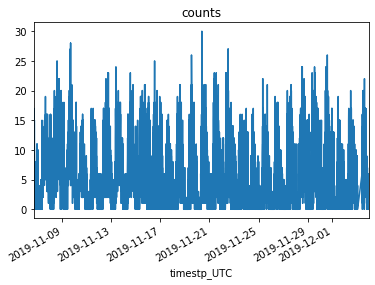

In [62]:
# example of pl
df_report['person'].plot(title='counts')

In [63]:
daytime = df_report['00:00': '23:45']

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 00:00:00